In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#정규분포 따르는 1000개 랜덤데이터(평0, 표1)
data=np.random.randn(1000)

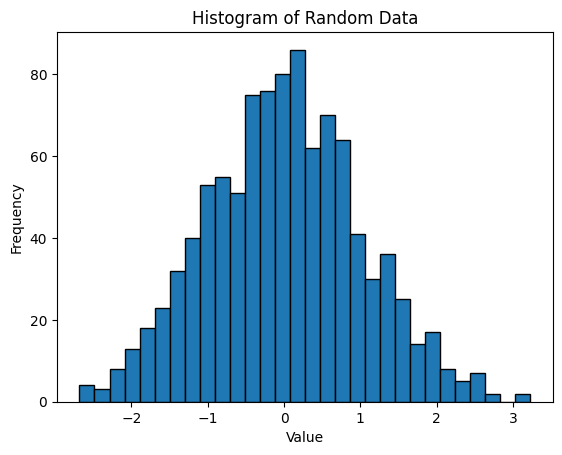

In [ ]:
plt.hist(data,bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')
plt.show()

In [ ]:
import pandas as pd

#한국인 1000명의 연간 육류소비량: 평균53.9kg 표5kg
#일본인 1000명의 연간 육류소비량: 평균32.7kg 표4kg
meat_korea=5*np.random.randn(1000)+53.9
meat_japan=4*np.random.randn(1000)+32.7

meat_consumption=pd.DataFrame({'Korea':meat_korea, 'Japan':meat_japan})
meat_consumption.head()

,Korea,Japan
0,59.982071,32.984492
1,58.035237,39.052848
2,58.086678,37.898763
3,53.656545,25.539206
4,43.409328,33.878978


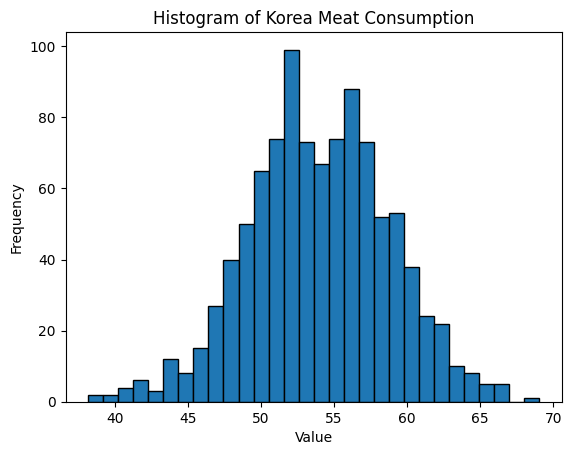

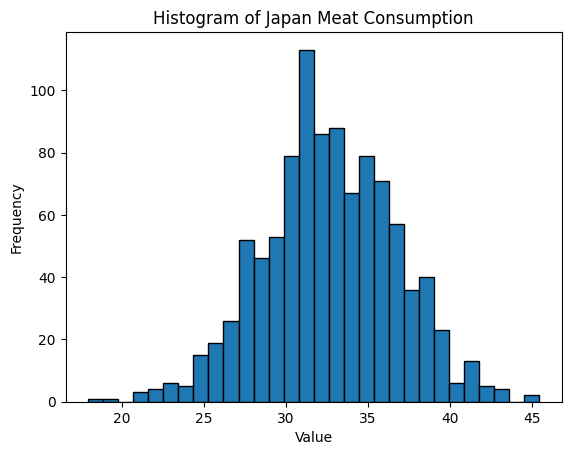

In [ ]:
#한국인 육류 소비량 히스토그램
plt.hist(meat_korea,bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Korea Meat Consumption')
plt.show()
#일본인 육류 소비량 히스토그램
plt.hist(meat_japan,bins=30, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Japan Meat Consumption')
plt.show()

z-score(z-표준화)
- 결과값:평균0, 표준편차1
- 공식:(변수-평균)/표준편차

Min-Max정규화
- 결과값:0~1
- 공식:(변수-min)/(max-min)
- 사용처
 - 이미지 처리(픽셀 값 조정)
 - 신경망 입력 데이터 전처리
 - 클러스터링 알고리즘에서 거리 기반으로 계산할 때

In [ ]:
meat_consumption["korea_std"]=(meat_consumption["Korea"]-meat_consumption["Korea"].mean())/meat_consumption["Korea"].std()
meat_consumption["japan_std"]=(meat_consumption["Japan"]-meat_consumption["Japan"].mean())/meat_consumption["Japan"].std()
meat_consumption.head()

,Korea,Japan,korea_std,japan_std
0,59.982071,32.984492,1.243173,0.088247
1,58.035237,39.052848,0.840681,1.584895
2,58.086678,37.898763,0.851316,1.300261
3,53.656545,25.539206,-0.064577,-1.747995
4,43.409328,33.878978,-2.183104,0.308856


In [ ]:
#사이킷런 스케일러 이용한 정규화
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
meat_consumption["Korea_std2"]=scaler.fit_transform(meat_consumption[["Korea"]])
meat_consumption["Japan_std2"]=scaler.fit_transform(meat_consumption[["Japan"]])
meat_consumption.head()

,Korea,Japan,korea_std,japan_std,Korea_std2,Japan_std2
0,59.982071,32.984492,1.243173,0.088247,1.243795,0.088291
1,58.035237,39.052848,0.840681,1.584895,0.841102,1.585688
2,58.086678,37.898763,0.851316,1.300261,0.851742,1.300912
3,53.656545,25.539206,-0.064577,-1.747995,-0.064609,-1.748869
4,43.409328,33.878978,-2.183104,0.308856,-2.184197,0.309010


In [ ]:
Min=np.min(meat_consumption["Korea"])
Max=np.max(meat_consumption["Korea"])
meat_consumption["Korea_mm"]=(meat_consumption["Korea"]-Min)/(Max-Min)

Max=np.min(meat_consumption["Japan"])
Min=np.max(meat_consumption["Japan"])
meat_consumption["Japan_mm"]=(meat_consumption["Japan"]-Min)/(Max-Min)

meat_consumption.head()

,Korea,Japan,korea_std,japan_std,Korea_std2,Japan_std2,Korea_mm,Japan_mm
0,59.982071,32.984492,1.243173,0.088247,1.243795,0.088291,0.706575,0.452496
1,58.035237,39.052848,0.840681,1.584895,0.841102,1.585688,0.643495,0.231802
2,58.086678,37.898763,0.851316,1.300261,0.851742,1.300912,0.645162,0.273773
3,53.656545,25.539206,-0.064577,-1.747995,-0.064609,-1.748869,0.501620,0.723267
4,43.409328,33.878978,-2.183104,0.308856,-2.184197,0.309010,0.169597,0.419965


In [ ]:
# 사이킷런에서 MinMaxScalar() 함수 이용
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
meat_consumption["Korea_mm2"]=scaler.fit_transform(meat_consumption[["Korea"]])
meat_consumption["Japan_mm2"]=scaler.fit_transform(meat_consumption[["Japan"]])
meat_consumption.head()

,Korea,Japan,korea_std,japan_std,Korea_std2,Japan_std2,Korea_mm,Japan_mm,Korea_mm2,Japan_mm2
0,59.982071,32.984492,1.243173,0.088247,1.243795,0.088291,0.706575,0.452496,0.706575,0.547504
1,58.035237,39.052848,0.840681,1.584895,0.841102,1.585688,0.643495,0.231802,0.643495,0.768198
2,58.086678,37.898763,0.851316,1.300261,0.851742,1.300912,0.645162,0.273773,0.645162,0.726227
3,53.656545,25.539206,-0.064577,-1.747995,-0.064609,-1.748869,0.501620,0.723267,0.501620,0.276733
4,43.409328,33.878978,-2.183104,0.308856,-2.184197,0.309010,0.169597,0.419965,0.169597,0.580035


In [ ]:
#의사결정나무 알고리즘
import pandas as pd
import numpy as np
import sklearn   #pip install scikit-learn

#의사결정나무 분류모델을 위한 패키지
from sklearn.tree import DecisionTreeClassifier

#학습 및 테스트 데이터셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split

In [ ]:
#아이리스 데이터셋 사용
#깃허브에 있는 csv파일 읽어옴
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.shape   #150행 5열

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2}, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]   #독립변수
y=df['species'] #종속변수
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=11)  # 테스트는 20%, 학습80%시킴
#random_state=11: 데이터 분할을 동일하게 유지하기 위한 설정값(임의로정함), 이후에도 같은 11값 사용해야함

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
dt=DecisionTreeClassifier(random_state=11)
dt.fit(X_train,y_train) # 학습수행

DecisionTreeClassifier(random_state=11)

In [ ]:
pred=dt.predict(X_test)  # 20%넣어서 예측
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [ ]:
#실제값과 예측값의 차이
print(y_test.values)  #실제
print(pred)   #예측

[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [ ]:
#모델성능-정확도 측정
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print(acc)

0.9333333333333333


타이타닉 데이터 의사결정나무
 - 타이타닉 생존영부 예측

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Age컬럼의 결측값을 평균으로 대치
d_mean=df['Age'].mean()
df['Age'].fillna(d_mean,inplace=True)

#출발항구코드 컬럼의 결측값을 최빈값으로 대치
d_mode=df["Embarked"].mode()[0]
df['Embarked'].fillna(d_mode,inplace=True)

df

<ipython-input-18-8d25bb5675c4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(d_mean,inplace=True)
<ipython-input-18-8d25bb5675c4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
#Sex 컬럼값을 1과 0으로 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df['Sex'])     #df['Sex'].replace({'male':0, 'female':1}, inplace=True)

#Embarked(출발항구코드) 컬럼값을 0,1,2로 레이블
df["Embarked"]=LabelEncoder().fit_transform(df['Embarked'])

#SibSp(형제배우자수), Parch(부모자녀수) 값 더해서 FamilySize컬럼(파생변수) 생성
df['FamilySize']=df['SibSp']+df['Parch']

In [ ]:
X=df[['Pclass','Sex','Age','Fare','Embarked','FamilySize']]
y=df['Survived']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=11)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [ ]:
dt=DecisionTreeClassifier(random_state=11)
dt.fit(X_train,y_train)  # 학습 수행

DecisionTreeClassifier(random_state=11)

In [ ]:
pred=dt.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [ ]:
for i, prediction in enumerate(pred):
  if prediction==1:
    print(f"Passenger {i+1} survived")
  else:
    print(f"Passenger {i+1} did not survive")

Passenger 1 survived
Passenger 2 did not survive
Passenger 3 did not survive
Passenger 4 survived
Passenger 5 did not survive
Passenger 6 did not survive
Passenger 7 did not survive
Passenger 8 survived
Passenger 9 did not survive
Passenger 10 did not survive
Passenger 11 did not survive
Passenger 12 did not survive
Passenger 13 did not survive
Passenger 14 did not survive
Passenger 15 did not survive
Passenger 16 did not survive
Passenger 17 did not survive
Passenger 18 did not survive
Passenger 19 survived
Passenger 20 survived
Passenger 21 did not survive
Passenger 22 survived
Passenger 23 did not survive
Passenger 24 survived
Passenger 25 did not survive
Passenger 26 did not survive
Passenger 27 did not survive
Passenger 28 did not survive
Passenger 29 did not survive
Passenger 30 survived
Passenger 31 survived
Passenger 32 survived
Passenger 33 survived
Passenger 34 survived
Passenger 35 did not survive
Passenger 36 did not survive
Passenger 37 did not survive
Passenger 38 did not

In [ ]:
#모델 성능 -정확도 측정
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print(acc)  # 의사결정나무에서 나온 정확도

0.7877094972067039


# 새로운 데이터


In [ ]:
new_passenger=pd.DataFrame({
    'Pclass':[1,3,2],
    'Sex':[1,0,1],
    'Age':[35,28,45],
    'Fare':[80,10,30],
    'Embarked':[0,1,0],
    'FamilySize':[3,1,2]
})

predictions=dt.predict(new_passenger)

for i, prediction in enumerate(predictions):
  if prediction==1:
    print(f"Passenger {i+1} survived")
  else:
    print(f"Passenger {i+1} did not survive")

Passenger 1 did not survive
Passenger 2 did not survive
Passenger 3 did not survive


In [37]:
#의사결정나무 알고리즘
import pandas as pd
import numpy as np
import sklearn   #pip install scikit-learn
import os
#의사결정나무 분류모델을 위한 패키지
from sklearn.tree import DecisionTreeClassifier,plot_tree

#학습 및 테스트 데이터셋 분리를 위한 패키지
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score